# Questionnaire Results Analysis

This notebook generates charts for the expert questionnaire responses.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Set style
plt.style.use("seaborn-v0_8-whitegrid")
sns.set_palette("husl")

# Load data
df = pd.read_csv("questionnaire-results.csv")
print(f"Loaded {len(df)} responses")
df.head()

Loaded 14 responses


,What is your current role?,How many years of software development experience do you have?,I intend to use insights from this security report in my next project,I plan to incorporate this report’s recommendations into our requirements process in the next quarter,I am likely to rely on this report’s OWASP/NIST/ISO mappings when defining security requirements,I would recommend using reports like this for my team’s projects,"If available, I would request generating such security reports for new initiatives",I am likely to allocate dedicated time during requirements elicitation to review this report,I intend to continue requesting such reports after this study,Unnamed: 9
0,Software Engineer,5-10,5,4,5,4,5,5,5,NaN
1,Researcher,1-3,5,4,3,4,3,3,3,NaN
2,Software Engineer,>10,5,3,5,4,4,5,4,NaN
3,DevOps,5-10,5,5,5,5,5,5,5,NaN
4,Software Engineer,>10,3,3,5,5,5,3,5,NaN


---
## Demographics

### Chart 1: Participant Roles


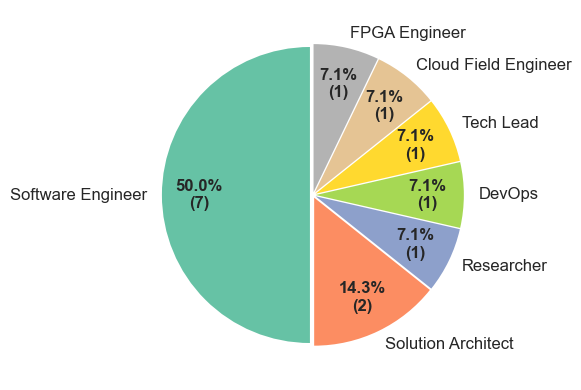

Role distribution:
  Software Engineer: 7 (50.0%)
  Solution Architect: 2 (14.3%)
  Researcher: 1 (7.1%)
  DevOps: 1 (7.1%)
  Tech Lead: 1 (7.1%)
  Cloud Field Engineer: 1 (7.1%)
  FPGA Engineer: 1 (7.1%)


In [16]:
fig, ax = plt.subplots(figsize=(8, 4))
role_col = df.columns[0]
role_counts = df[role_col].value_counts()
colors = plt.cm.Set2(np.linspace(0, 1, len(role_counts)))
wedges, texts, autotexts = ax.pie(
    role_counts.values,
    labels=role_counts.index,
    colors=colors,
    autopct=lambda pct: f"{pct:.1f}%\n({int(round(pct/100*len(df)))})",
    startangle=90,
    explode=[0.02] * len(role_counts),
    pctdistance=0.75,
)
for text in texts:
    text.set_fontsize(12)
for autotext in autotexts:
    autotext.set_fontsize(12)
    autotext.set_fontweight("bold")
# ax.set_title("Participant Roles", fontsize=14, fontweight="bold")
plt.tight_layout()
plt.savefig("chart_01_roles.png", dpi=150, bbox_inches="tight")
plt.show()
print(f"Role distribution:")
for role, count in role_counts.items():
    print(f"  {role}: {count} ({count/len(df)*100:.1f}%)")

### Chart 2: Years of Experience


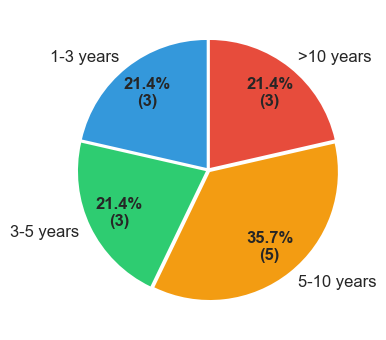

Experience distribution:
  1-3 years: 3 (21.4%)
  3-5 years: 3 (21.4%)
  5-10 years: 5 (35.7%)
  >10 years: 3 (21.4%)


In [101]:
fig, ax = plt.subplots(figsize=(10, 3.5))
exp_col = df.columns[1]
# Order experience categories logically
exp_order = ["1-3", "3-5", "5-10", ">10"]
exp_counts = df[exp_col].value_counts().reindex(exp_order).dropna()
colors = ["#3498db", "#2ecc71", "#f39c12", "#e74c3c"]
wedges, texts, autotexts = ax.pie(
    exp_counts.values,
    labels=[f"{e} years" for e in exp_counts.index],
    colors=colors[: len(exp_counts)],
    autopct=lambda pct: f"{pct:.1f}%\n({int(round(pct/100*len(df)))})",
    startangle=90,
    explode=[0.02] * len(exp_counts),
    pctdistance=0.75,
)
for text in texts:
    text.set_fontsize(12)
for autotext in autotexts:
    autotext.set_fontsize(12)
    autotext.set_fontweight("bold")
# ax.set_title("Years of Software Development Experience", fontsize=14, fontweight="bold")
plt.tight_layout()
plt.savefig("chart_02_experience.png", dpi=150, bbox_inches="tight")
plt.show()
print(f"Experience distribution:")
for exp, count in exp_counts.items():
    print(f"  {exp} years: {count} ({count/len(df)*100:.1f}%)")

---
## Behavioral Intention Responses (Likert Scale)


In [24]:
# Get Likert questions (columns 3-9, index 2-8)
likert_cols = df.columns[2:9]
likert_labels = [
    "Q1: Intend to use insights in next project",
    "Q2: Plan to incorporate into requirements process",
    "Q3: Rely on OWASP/NIST/ISO mappings",
    "Q4: Recommend for team projects",
    "Q5: Request reports for new initiatives",
    "Q6: Allocate time during requirements elicitation",
    "Q7: Continue requesting after study",
]
likert_scale = [1, 2, 3, 4, 5]
likert_scale_labels = ["Strongly Disagree", "Disagree", "Neutral", "Agree", "Strongly Agree"]
print("Likert Questions:")
for i, col in enumerate(likert_cols):
    print(f"  {likert_labels[i]}")
    print(f"    Original: {col[:60]}..." if len(col) > 60 else f"    Original: {col}")

Likert Questions:
  Q1: Intend to use insights in next project
    Original: I intend to use insights from this security report in my nex...
  Q2: Plan to incorporate into requirements process
    Original: I plan to incorporate this report’s recommendations into our...
  Q3: Rely on OWASP/NIST/ISO mappings
    Original: I am likely to rely on this report’s OWASP/NIST/ISO mappings...
  Q4: Recommend for team projects
    Original: I would recommend using reports like this for my team’s proj...
  Q5: Request reports for new initiatives
    Original: If available, I would request generating such security repor...
  Q6: Allocate time during requirements elicitation
    Original: I am likely to allocate dedicated time during requirements e...
  Q7: Continue requesting after study
    Original: I intend to continue requesting such reports after this stud...


In [85]:
def create_likert_bar_chart(data, question_label, save_path):
    """Create a compact horizontal bar chart for Likert responses."""
    fig, ax = plt.subplots(figsize=(10, 4))

    # Count responses for each Likert value
    counts = data.value_counts().reindex(likert_scale, fill_value=0)
    percentages = counts / len(data) * 100

    # Color gradient from red (1) to green (5)
    colors = ["#e74c3c", "#e67e22", "#f1c40f", "#2ecc71", "#27ae60"]

    # Create horizontal bars
    bars = ax.barh(likert_scale_labels, counts.values, color=colors, edgecolor="white", height=0.7)

    # Add count and percentage labels
    for bar, count, pct in zip(bars, counts.values, percentages.values):
        if count > 0:
            ax.text(count + 0.1, bar.get_y() + bar.get_height() / 2, f"{count} ({pct:.0f}%)", va="center", fontsize=14, fontweight="bold")

    ax.set_xlabel("Number of Responses", fontsize=12)
    # ax.set_title(question_label, fontsize=12, fontweight="bold", loc="left")
    ax.set_xlim(0, max(counts.values) + 1)
    ax.yaxis.grid(False)  # Remove horizontal grid lines
    ax.tick_params(axis="y", labelsize=12)  # Set y-axis label size

    # Add mean indicator
    mean_val = data.mean()

    # # Add mean annotation
    # ax.text(
    #     0.98,
    #     0.02,
    #     f"Mean: {mean_val:.2f}",
    #     transform=ax.transAxes,
    #     fontsize=12,
    #     fontweight="bold",
    #     ha="right",
    #     va="bottom",
    #     bbox=dict(boxstyle="round,pad=0.3", facecolor="white", edgecolor="gray", alpha=0.8),
    # )

    plt.tight_layout()
    plt.savefig(save_path, dpi=150, bbox_inches="tight")
    plt.show()

    return mean_val, data.std()

### Chart 3: Q1 - Intend to use insights in next project


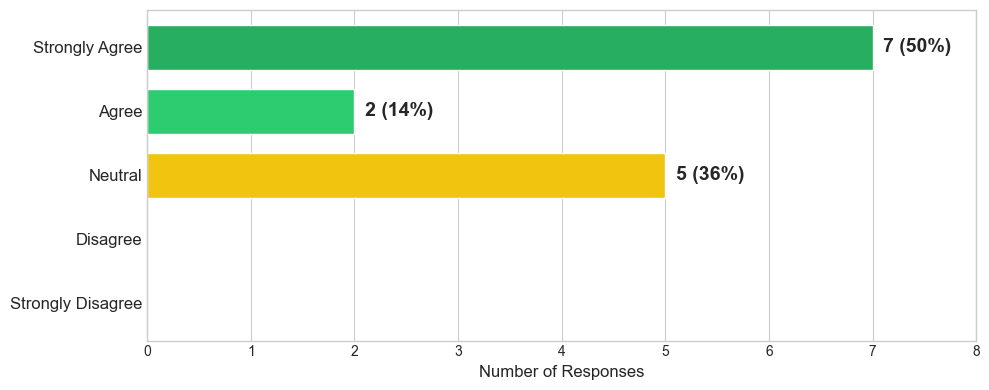

Mean: 4.14, Std: 0.95


In [87]:
mean, std = create_likert_bar_chart(
    df[likert_cols[0]], "Q1: I intend to use insights from this security report in my next project", "chart_03_q1_use_insights.png"
)
print(f"Mean: {mean:.2f}, Std: {std:.2f}")

### Chart 4: Q2 - Plan to incorporate into requirements process


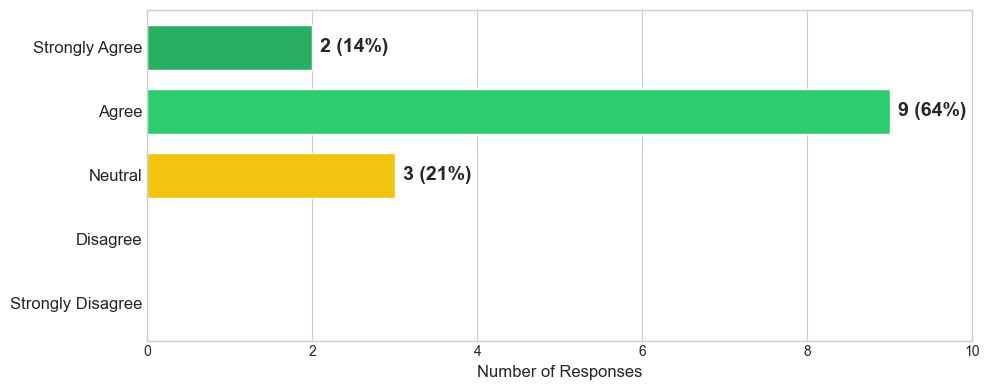

Mean: 3.93, Std: 0.62


In [88]:
mean, std = create_likert_bar_chart(
    df[likert_cols[1]],
    "Q2: I plan to incorporate this report's recommendations into our requirements process",
    "chart_04_q2_incorporate.png",
)
print(f"Mean: {mean:.2f}, Std: {std:.2f}")

### Chart 5: Q3 - Rely on OWASP/NIST/ISO mappings


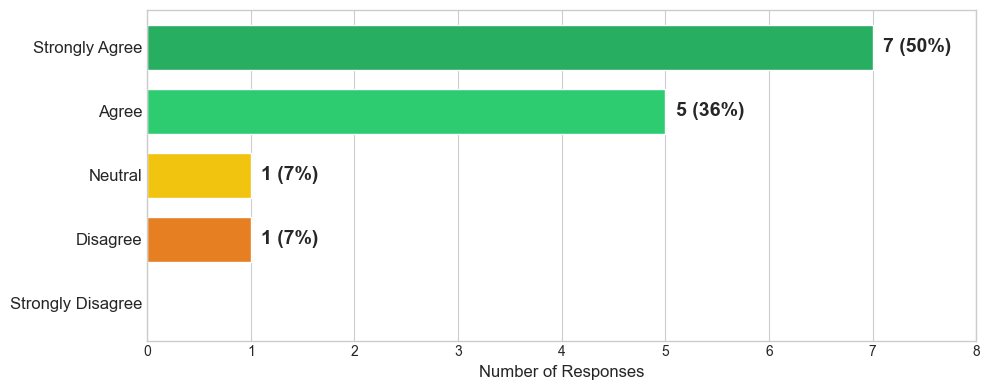

Mean: 4.29, Std: 0.91


In [89]:
mean, std = create_likert_bar_chart(
    df[likert_cols[2]], "Q3: I am likely to rely on this report's OWASP/NIST/ISO mappings", "chart_05_q3_mappings.png"
)
print(f"Mean: {mean:.2f}, Std: {std:.2f}")

### Chart 6: Q4 - Recommend for team projects


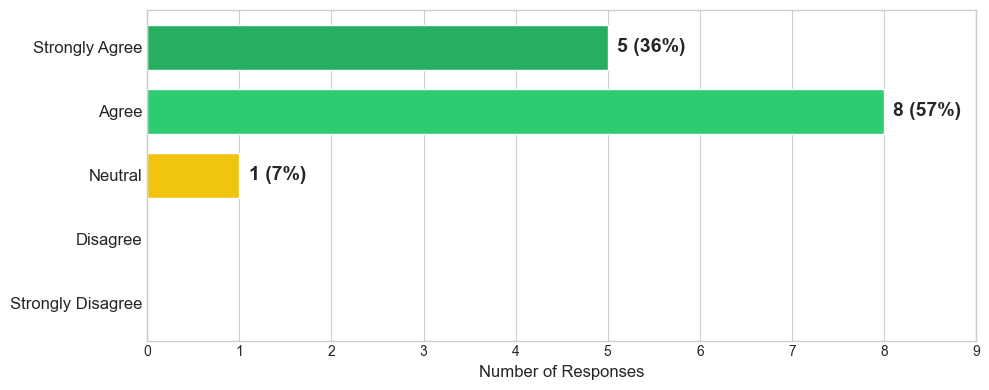

Mean: 4.29, Std: 0.61


In [90]:
mean, std = create_likert_bar_chart(
    df[likert_cols[3]], "Q4: I would recommend using reports like this for my team's projects", "chart_06_q4_recommend.png"
)
print(f"Mean: {mean:.2f}, Std: {std:.2f}")

### Chart 7: Q5 - Request reports for new initiatives


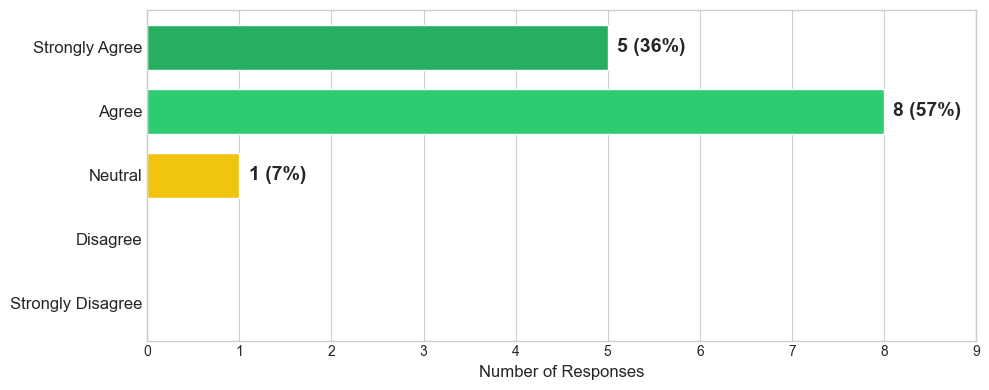

Mean: 4.29, Std: 0.61


In [91]:
mean, std = create_likert_bar_chart(
    df[likert_cols[4]], "Q5: If available, I would request generating such security reports for new initiatives", "chart_07_q5_request.png"
)
print(f"Mean: {mean:.2f}, Std: {std:.2f}")

### Chart 8: Q6 - Allocate time during requirements elicitation


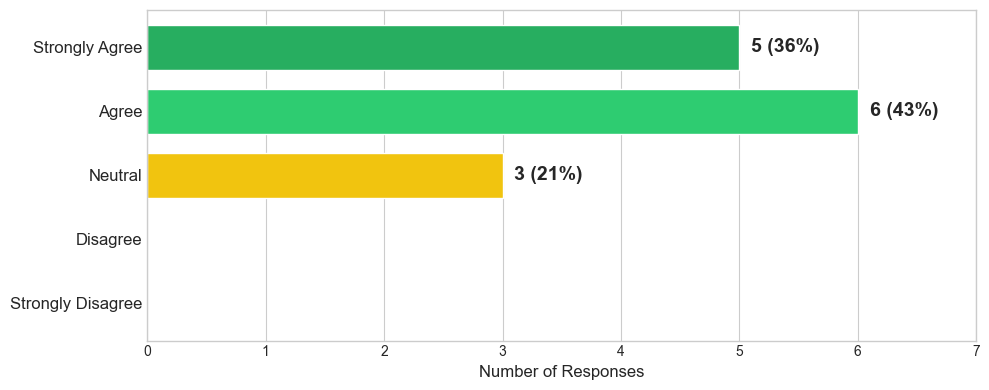

Mean: 4.14, Std: 0.77


In [92]:
mean, std = create_likert_bar_chart(
    df[likert_cols[5]],
    "Q6: I am likely to allocate dedicated time during requirements elicitation to review this report",
    "chart_08_q6_allocate_time.png",
)
print(f"Mean: {mean:.2f}, Std: {std:.2f}")

### Chart 9: Q7 - Continue requesting after study


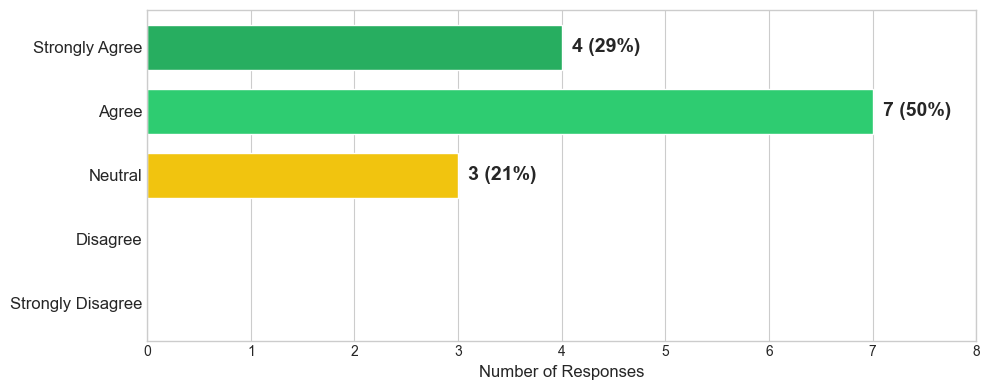

Mean: 4.07, Std: 0.73


In [93]:
mean, std = create_likert_bar_chart(
    df[likert_cols[6]], "Q7: I intend to continue requesting such reports after this study", "chart_09_q7_continue.png"
)
print(f"Mean: {mean:.2f}, Std: {std:.2f}")

---
## Summary Overview

### Chart 10: Summary - All Questions Mean Scores


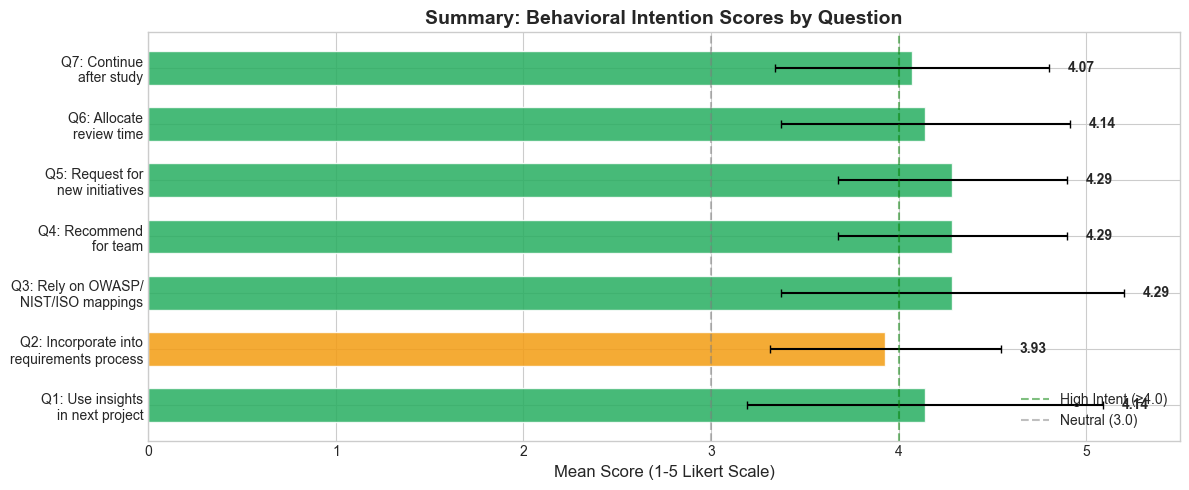

Overall Mean across all questions: 4.16


In [94]:
fig, ax = plt.subplots(figsize=(12, 5))

# Calculate means for all Likert questions
means = [df[col].mean() for col in likert_cols]
stds = [df[col].std() for col in likert_cols]

short_labels = [
    "Q1: Use insights\nin next project",
    "Q2: Incorporate into\nrequirements process",
    "Q3: Rely on OWASP/\nNIST/ISO mappings",
    "Q4: Recommend\nfor team",
    "Q5: Request for\nnew initiatives",
    "Q6: Allocate\nreview time",
    "Q7: Continue\nafter study",
]

# Color based on mean value
colors = ["#27ae60" if m >= 4.0 else "#f39c12" if m >= 3.5 else "#e74c3c" for m in means]

bars = ax.barh(short_labels, means, xerr=stds, color=colors, edgecolor="white", height=0.6, capsize=3, alpha=0.85)

# Add value labels
for bar, mean, std in zip(bars, means, stds):
    ax.text(mean + std + 0.1, bar.get_y() + bar.get_height() / 2, f"{mean:.2f}", va="center", fontsize=10, fontweight="bold")

ax.set_xlabel("Mean Score (1-5 Likert Scale)", fontsize=12)
ax.set_title("Summary: Behavioral Intention Scores by Question", fontsize=14, fontweight="bold")
ax.set_xlim(0, 5.5)
ax.axvline(x=4.0, color="green", linestyle="--", alpha=0.5, label="High Intent (≥4.0)")
ax.axvline(x=3.0, color="gray", linestyle="--", alpha=0.5, label="Neutral (3.0)")
ax.legend(loc="lower right")

plt.tight_layout()
plt.savefig("chart_10_summary_means.png", dpi=150, bbox_inches="tight")
plt.show()

overall_mean = np.mean(means)
print(f"Overall Mean across all questions: {overall_mean:.2f}")

---
## Summary Statistics


In [95]:
summary_data = {
    "Question": likert_labels,
    "Mean": [df[col].mean() for col in likert_cols],
    "Std": [df[col].std() for col in likert_cols],
    "Min": [df[col].min() for col in likert_cols],
    "Max": [df[col].max() for col in likert_cols],
    "Median": [df[col].median() for col in likert_cols],
}
summary = pd.DataFrame(summary_data)
summary.to_csv("questionnaire_summary_statistics.csv", index=False)
print("Summary Statistics saved to questionnaire_summary_statistics.csv")
summary.round(2)

Summary Statistics saved to questionnaire_summary_statistics.csv


,Question,Mean,Std,Min,Max,Median
0,Q1: Intend to use insights in next project,4.14,0.95,3,5,4.5
1,Q2: Plan to incorporate into requirements process,3.93,0.62,3,5,4.0
2,Q3: Rely on OWASP/NIST/ISO mappings,4.29,0.91,2,5,4.5
3,Q4: Recommend for team projects,4.29,0.61,3,5,4.0
4,Q5: Request reports for new initiatives,4.29,0.61,3,5,4.0
5,Q6: Allocate time during requirements elicitation,4.14,0.77,3,5,4.0
6,Q7: Continue requesting after study,4.07,0.73,3,5,4.0


In [96]:
print("=" * 60)
print("CHARTS GENERATED")
print("=" * 60)
print("\nDemographics:")
print("  - chart_01_roles.png")
print("  - chart_02_experience.png")
print("\nBehavioral Intention Questions (Likert):")
print("  - chart_03_q1_use_insights.png")
print("  - chart_04_q2_incorporate.png")
print("  - chart_05_q3_mappings.png")
print("  - chart_06_q4_recommend.png")
print("  - chart_07_q5_request.png")
print("  - chart_08_q6_allocate_time.png")
print("  - chart_09_q7_continue.png")
print("\nSummary:")
print("  - chart_10_summary_means.png")

CHARTS GENERATED

Demographics:
  - chart_01_roles.png
  - chart_02_experience.png

Behavioral Intention Questions (Likert):
  - chart_03_q1_use_insights.png
  - chart_04_q2_incorporate.png
  - chart_05_q3_mappings.png
  - chart_06_q4_recommend.png
  - chart_07_q5_request.png
  - chart_08_q6_allocate_time.png
  - chart_09_q7_continue.png

Summary:
  - chart_10_summary_means.png
